# Data Project - Stock Market Analysis

The aim is to analyse the risk of a stock, based on its previous performance history.<br>
Also, try to predict the future stock prices using Monte Carlo method.

The questions that will be answered along the way:

1.) What was the change in the price of the stock over time?<br>
2.) What was the daily return of the stock on average ?<br>
3.) What was the moving average of the various stocks?<br>
4.) What was the correlation between different stocks' closing prices and daily returns?<br>
5.) How much value do we put at risk by investing in a particular stock?<br>
6.) How can attempt to predict future stock behaviour?

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')# Sets a white grid background
%matplotlib inline

In [3]:
from pandas_datareader import data, wb
# Functions from pandas_datareader.data and pandas_datareader.wb extract data from
# various Internet sources into a pandas DataFrame.

/home/muskan/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
import pandas_datareader as pdr

In [5]:
from datetime import datetime

In [6]:
from __future__ import division # future used to increase compatibility between python2 and python3 code

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)
# So here, globals()[stock] makes the list element 'stock' a global dataframe

In [13]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-22,185.710007,182.550003,184.660004,182.779999,29748600.0,180.624329
2019-05-23,180.539993,177.809998,179.800003,179.660004,36529700.0,177.541138
2019-05-24,182.139999,178.619995,180.199997,178.970001,23714700.0,176.859283
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,176.128006
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,175.288025
...,...,...,...,...,...,...
2020-05-18,316.500000,310.320007,313.170013,314.959991,33843100.0,314.959991
2020-05-19,318.519989,313.010010,315.029999,313.140015,25432400.0,313.140015
2020-05-20,319.519989,316.519989,316.679993,319.230011,27876200.0,319.230011


In [14]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-22,1158.520020,1145.890015,1146.750000,1151.420044,914500,1151.420044
2019-05-23,1145.973022,1129.223999,1140.500000,1140.770020,1198900,1140.770020
2019-05-24,1149.765015,1131.660034,1147.359985,1133.469971,1112000,1133.469971
2019-05-28,1151.587036,1133.119995,1134.000000,1134.150024,1365000,1134.150024
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961
...,...,...,...,...,...,...
2020-05-18,1392.324951,1354.250000,1361.750000,1383.939941,1824000,1383.939941
2020-05-19,1392.000000,1373.484985,1386.996948,1373.484985,1280600,1373.484985
2020-05-20,1410.420044,1387.250000,1389.579956,1406.719971,1655400,1406.719971


In [15]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,253.992992,248.292087,250.762480,251.375905,3.349035e+07,249.883696
std,44.014794,42.781142,43.215795,43.651447,1.715553e+07,44.102959
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,210.497498,207.222496,208.792496,208.872498,2.186125e+07,207.098209
50%,257.729996,247.525002,250.745003,253.574997,2.845690e+07,252.890434
75%,289.902512,282.777512,284.797508,287.992493,3.804492e+07,287.215019
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


Stock chart volume is the number of shares traded during a given time period. Usually plotted as a histogram under a chart, volume represents the interest level in a stock. If a stock is trading on low volume, then there is not much interest in the stock.

In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-05-22 to 2020-05-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


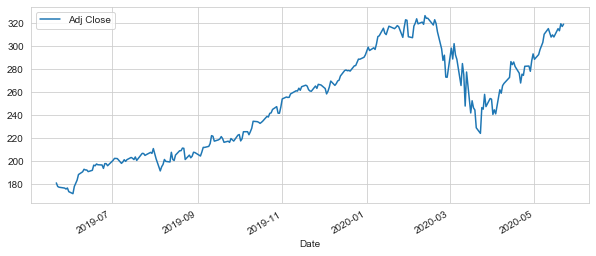

In [17]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

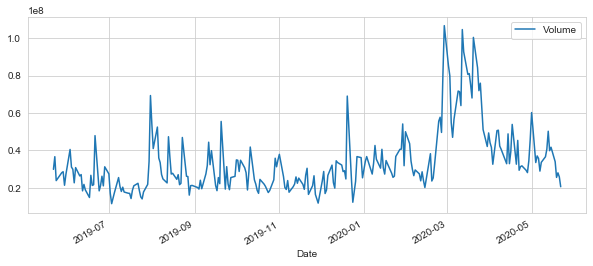

In [18]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

### Moving Average of the stock

Check out the following links:<br>
1) https://www.investopedia.com/terms/m/movingaverage.asp<br>
2) https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp


In [19]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

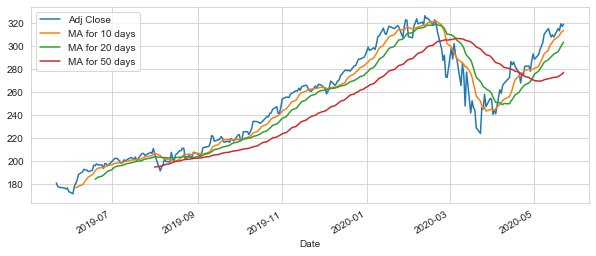

In [20]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

## Daily Return
The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.

In [21]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

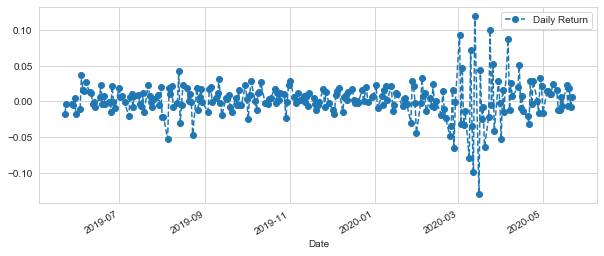

In [22]:
AAPL['Daily Return'].plot(figsize=(10,4),linestyle='--',marker='o',legend=True)

####  An opening price is not identical to the previous day's closing price.

In [23]:
# Now we need to count how many times it lied in an interval

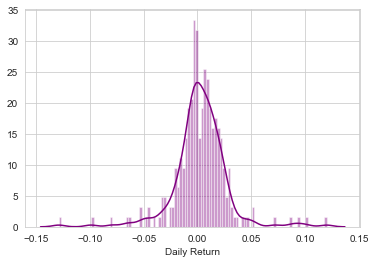

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')
#distplot produces a histogram along with a KDE

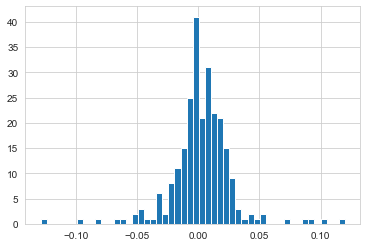

In [25]:
AAPL['Daily Return'].hist(bins=50)

### Studying Product Correlation

In [26]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

In [27]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-22,180.624329,1151.420044,126.118073,1859.680054
2019-05-23,177.541138,1140.770020,124.646194,1815.479980
2019-05-24,176.859283,1133.469971,124.705452,1823.280029
2019-05-28,176.128006,1134.150024,124.626442,1836.430054
2019-05-29,175.288025,1116.459961,123.421265,1819.189941


In [28]:
tech_rets = closing_df.pct_change()

In [29]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-22,NaN,NaN,NaN,NaN
2019-05-23,-0.017070,-0.009249,-0.011671,-0.023768
2019-05-24,-0.003841,-0.006399,0.000475,0.004296
2019-05-28,-0.004135,0.000600,-0.000634,0.007212
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388


In statistics, the Pearson correlation coefficient(PCC) is a statistic that measures linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

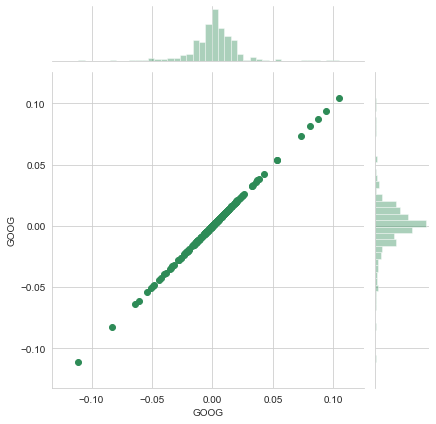

In [30]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')
# Linear plot implies maximum correlation
# The more the dispersion, the lesser is the correlation

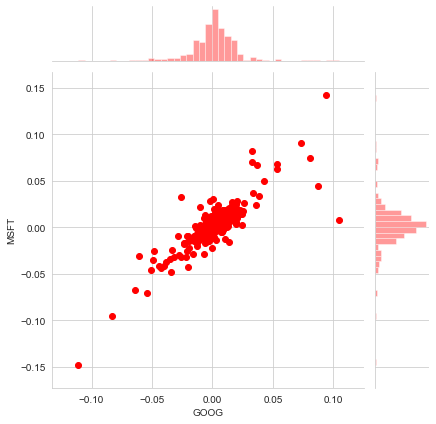

In [31]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='red')
# This plot implies PCC = 0.8

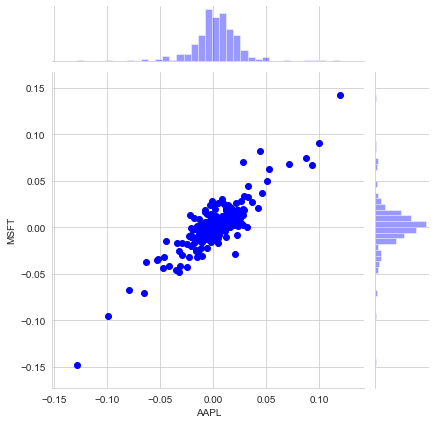

In [32]:
sns.jointplot('AAPL','MSFT',tech_rets,kind='scatter',color='blue')
# This plot implies PCC = 0.8

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

### Plotting each pair-possible

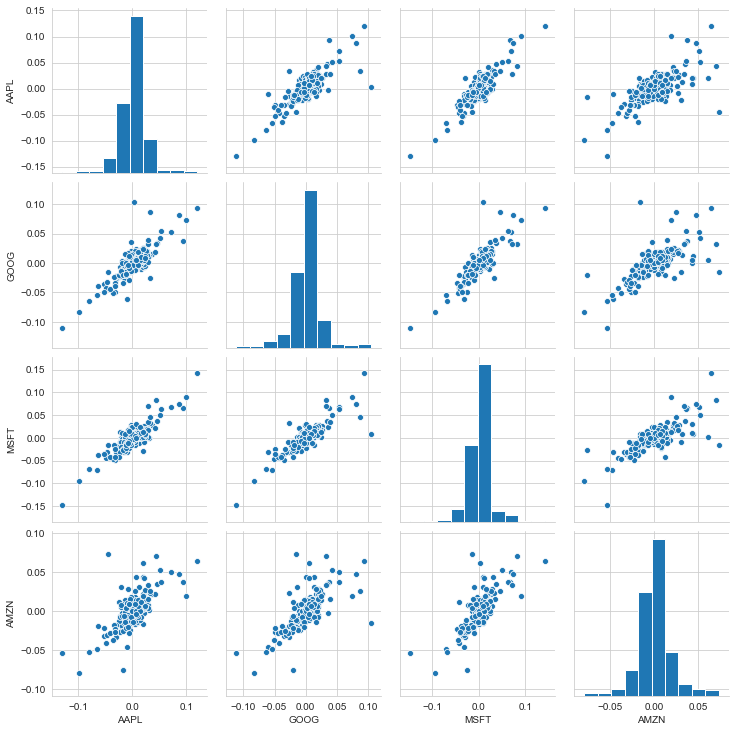

In [33]:
sns.pairplot(tech_rets.dropna())

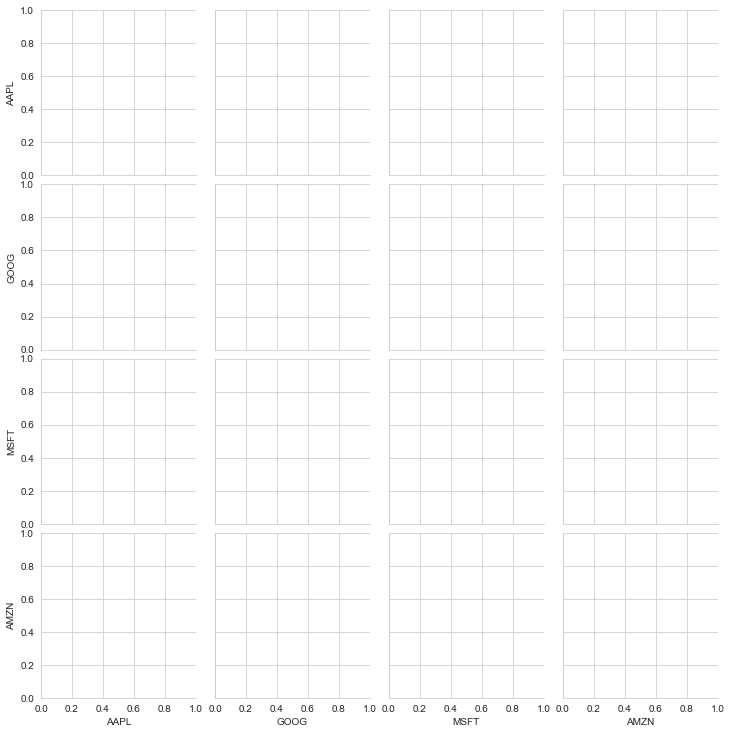

In [34]:
returns_fig = sns.PairGrid(tech_rets.dropna())
# Makes a grid of plots

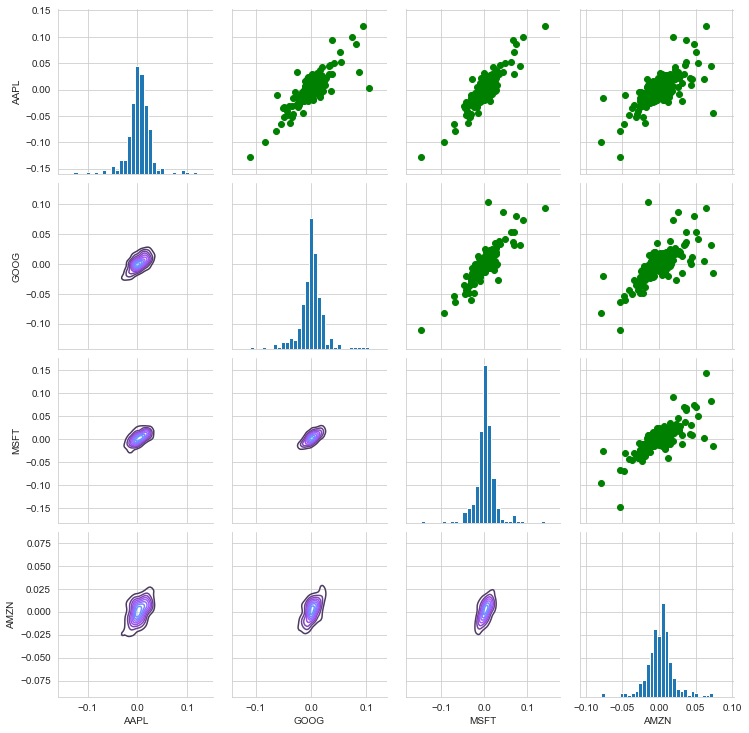

In [35]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='green')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

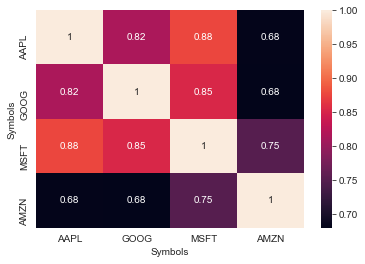

In [36]:
sns.heatmap(tech_rets.corr(),annot=True)
# Gives a correlation matrix
# Maximum correlation between MSFT and AAPL
# As is pretty evident from the scatter plot as well

### Risk Analysis
Studying the risk associated with a stock

 https://www.investopedia.com/articles/stocks/11/calculating-risk-reward.asp

In [37]:
rets = tech_rets.dropna()
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-22,NaN,NaN,NaN,NaN
2019-05-23,-0.017070,-0.009249,-0.011671,-0.023768
2019-05-24,-0.003841,-0.006399,0.000475,0.004296
2019-05-28,-0.004135,0.000600,-0.000634,0.007212
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
...,...,...,...,...
2020-05-18,0.023561,0.007828,0.009554,0.006839
2020-05-19,-0.005778,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846


In [38]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-23,-0.017070,-0.009249,-0.011671,-0.023768
2019-05-24,-0.003841,-0.006399,0.000475,0.004296
2019-05-28,-0.004135,0.000600,-0.000634,0.007212
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578


In [39]:
rets.mean()

Symbols
AAPL    0.002567
GOOG    0.001062
MSFT    0.001798
AMZN    0.001263
dtype: float64

In [40]:
area = np.pi*20

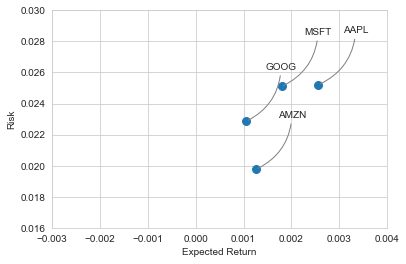

In [41]:
plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlim([-0.003,0.004])
plt.ylim([0.016,0.03])

plt.xlabel('Expected Return')
plt.ylabel('Risk')
# s gives the area of the marker tip
# We expect a stock to have high expected return and a lower risk
# the below code just annotates the 4 points with their resp. tech stocks
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(50,50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '-',color='grey', connectionstyle = 'arc3,rad=-0.3'))

# Value at Risk
We can treat the value at risk as the amount of money we expect to lose for a given confidence interval 

## I. Using Bootstrap Method

### 1. AAPL

In [42]:
# Lets analyse AAPL Stocks and calculate its Risk Value 
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-05-22,185.710007,182.550003,184.660004,182.779999,29748600.0,180.624329,NaN,NaN,NaN,NaN
2019-05-23,180.539993,177.809998,179.800003,179.660004,36529700.0,177.541138,NaN,NaN,NaN,-0.017070
2019-05-24,182.139999,178.619995,180.199997,178.970001,23714700.0,176.859283,NaN,NaN,NaN,-0.003841
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,176.128006,NaN,NaN,NaN,-0.004135
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,175.288025,NaN,NaN,NaN,-0.004769


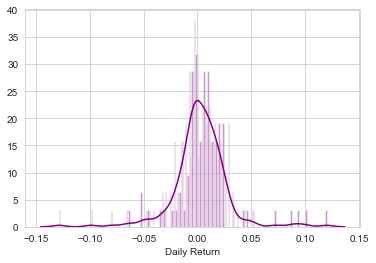

In [43]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=200,color='purple')

In [44]:
rets.head() # It stores the Daily Returns of each stock
# The negative values imply loss

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-23,-0.017070,-0.009249,-0.011671,-0.023768
2019-05-24,-0.003841,-0.006399,0.000475,0.004296
2019-05-28,-0.004135,0.000600,-0.000634,0.007212
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578


In [45]:
rets['AAPL'].quantile(0.05)

-0.03301109194900948

The 0.05 empirical quantile of daily returns is -0.033. This means that with 95% confidence, our worst daily loss will not exceed 3.3%.

If we have a 1 million dollar investment, then our one-day 5% VaR is 0.033*1,000,000 = $33,000.

### 2. GOOG

In [46]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-22,1158.520020,1145.890015,1146.750000,1151.420044,914500,1151.420044
2019-05-23,1145.973022,1129.223999,1140.500000,1140.770020,1198900,1140.770020
2019-05-24,1149.765015,1131.660034,1147.359985,1133.469971,1112000,1133.469971
2019-05-28,1151.587036,1133.119995,1134.000000,1134.150024,1365000,1134.150024
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961


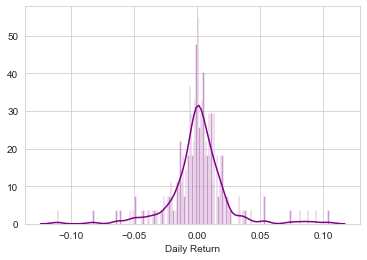

In [47]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
sns.distplot(GOOG['Daily Return'].dropna(),bins=200,color='purple')

In [48]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-05-22,1158.520020,1145.890015,1146.750000,1151.420044,914500,1151.420044,NaN
2019-05-23,1145.973022,1129.223999,1140.500000,1140.770020,1198900,1140.770020,-0.009249
2019-05-24,1149.765015,1131.660034,1147.359985,1133.469971,1112000,1133.469971,-0.006399
2019-05-28,1151.587036,1133.119995,1134.000000,1134.150024,1365000,1134.150024,0.000600
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961,-0.015598


In [49]:
rets['GOOG'].quantile(0.05)

-0.03457167691969172

Our one-day 5% VaR is 0.034*1,000,000 = $34,000

### 3. MSFT

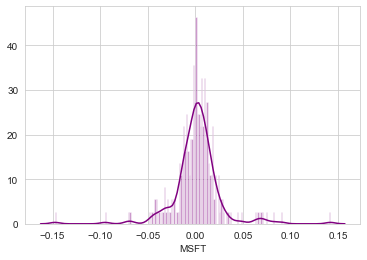

In [50]:
sns.distplot(rets['MSFT'],bins=200,color='purple')

In [51]:
rets['MSFT'].quantile(0.05)

-0.03282078559538271

Our one-day 5% VaR is $32,900

### 4. AMZN

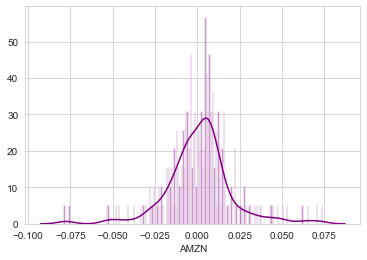

In [52]:
sns.distplot(rets['AMZN'],bins=200,color='purple')

In [53]:
rets['AMZN'].quantile(0.05)

-0.027603259337557896

In [76]:
np.percentile(rets['AMZN'],5)

-0.027603259337557896

Our one-day 5% VaR is $27,600.

Amazon - Least VaR <br>
Google - Highest VaR

In [54]:
# So, AMZN has the least VaR = $27,600 and GOOG has the highest VaR = $34,000 *

## Using Monte Carlo Method

https://www.investopedia.com/terms/m/montecarlosimulation.asp

https://www.investopedia.com/articles/07/montecarlo.asp

In [64]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [68]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        # loc implies the mean and scale implies the std dev
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price
        
    

### Analysing VaR using Monte Carlo Method

### 1. GOOG

In [69]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2019-05-22,1158.520020,1145.890015,1146.750000,1151.420044,914500,1151.420044,NaN
2019-05-23,1145.973022,1129.223999,1140.500000,1140.770020,1198900,1140.770020,-0.009249
2019-05-24,1149.765015,1131.660034,1147.359985,1133.469971,1112000,1133.469971,-0.006399
2019-05-28,1151.587036,1133.119995,1134.000000,1134.150024,1365000,1134.150024,0.000600
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961,-0.015598


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

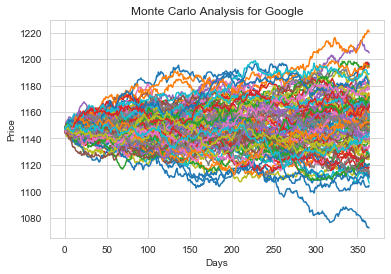

In [70]:
start_price = 1146.75

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [71]:
# Now plotting only the ending Price values into a histogram

In [72]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

(array([  1.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          3.,   1.,   3.,   4.,   3.,   4.,   3.,   5.,   4.,   0.,   8.,
          4.,  11.,   5.,   6.,   8.,   8.,   4.,   8.,   3.,  14.,  12.,
          9.,  19.,  16.,  21.,  15.,  21.,  16.,  22.,  31.,  26.,  17.,
         36.,  30.,  37.,  40.,  36.,  51.,  47.,  41.,  56.,  55.,  67.,
         47.,  56.,  54.,  61.,  75.,  72.,  80.,  84.,  84.,  87.,  98.,
         98.,  94., 111., 110., 129., 112.,  92., 115., 119., 113.,  91.,
        134., 118., 114., 128., 142., 160., 158., 149., 141., 166., 139.,
        160., 147., 146., 164., 145., 154., 160., 168., 153., 144., 136.,
        137., 130., 143., 155., 125., 130., 127., 103., 115., 128., 118.,
        109., 117., 113., 109.,  94.,  93., 103., 109.,  78.,  84.,  83.,
         88.,  79.,  85.,  78.,  66.,  66.,  54.,  53.,  65.,  44.,  59.,
         49.,  42.,  52.,  35.,  41.,  40.,  26.,  33.,  25.,  31.,  26.,
         25.,  25.,  27.,  18.,  21., 

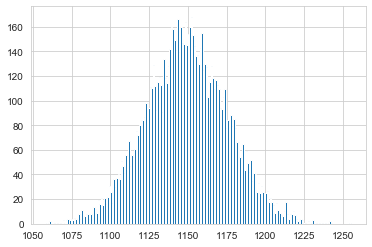

In [73]:
plt.hist(simulations,bins=200)

Text(0.5, 1.0, 'Final Price distribution after 365 days')

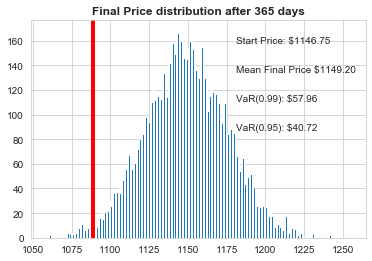

In [87]:
plt.hist(simulations,bins=200)

q = np.percentile(simulations,1)

# Marking some additional info. on the plot
# Starting Price
plt.figtext(0.6,0.8,"Start Price: $%.2f" %start_price)

# Mean ending Price or the mean of the histogram
plt.figtext(0.6,0.7,"Mean Final Price $%.2f" % simulations.mean())

# VaR
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price - q))

plt.figtext(0.6,0.5,"VaR(0.95): $%.2f" % (start_price - np.percentile(simulations,5)))

plt.axvline(x=q,linewidth=4,color='r')

plt.title("Final Price distribution after 365 days",weight='bold')

In [81]:
q # Implying with 99% confidence the final price will be greater than $1088.78 and hence VaR is (start_price - q)

1088.7854542629977

In [90]:
# VaR(0.95) = '$40.72' for each google stock ith starting price = $1146.75 so, our maximum loss with 95% confidence
# can be 40.72/1146.75 = 0.035 or 3.5%.
# Which is quite close to 0.034 calculated using bootstrap method